# Professor Brooks Cycling Adventure

## <font color='Purple'>Rule et al's Ten Rules </font>

#### Rule 1: Tell a story for an audience

Jupyter Notebook makes it very easy to flow and tell a narrative, while simultaneously showing users the steps that were taken to draw specific conclusions. In my notebook, I wanted to display the questions, the process/method, and the conclusions. I also attempted to interweave a narrative that acted as a story that the audience could follow. This not only helps readers stay with the story, but it can help strengthen the understanding and the purpose of the project in the first place.






#### Rule 2: Document the process, not just the results

Throughout my narrative and experimentation, there were a lot of extra steps, print statements, and dead-ends that I reached, and I think its important to talk through these points. This gives readers an insight into your mindspace and how you tackled each problem.

Documenting the process is just as, if not more important than documenting just the results. People need to understand how you got the results you did. I also made an effort to clean and organize the notebook in a streamlined fashion to ensure users understand the flow of the process itself.

#### Rule 3: Use cell divisions to make steps clear

I really like the interactivity of the Jupyter Notebooks enviornment. I wanted to ensure that each cell division was a meaningful part of the process. It should also be clear what the cell divisions means. I try breaking up cell divisions in an introduction and processing cell, and then after the image or plot is shown, a conclusion cell to wrap up or revisit questions we asked previously. This ties the narrative together in a succint manner.

## Introduction

Professor Brooks started cycling and recording all sorts of data, from location, time, heart rate, altitude, and much more. We're going to take a look at the data and see what it says about his excercise habits, and geographical area in which he cycles.

We'll start by importing necessary libraries that will help with our analyses.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math


Next we'll read in our data from the assets folder, along with our own uploaded activities file that was obtained from our class discussion. It reads in the datafiles and matches the activity for that session of excercise. We then merged the two so that we get the original strava data, with the matched activity to make our analyses run smoother.

I also created an average dataframe to get the average values for each datafile, which corresponds to a workout session.

We can now compare various things. I chose to look at how fast Professor Brooks went on each activity, heart rate in relation to how fast he was going, and distance for each activity.


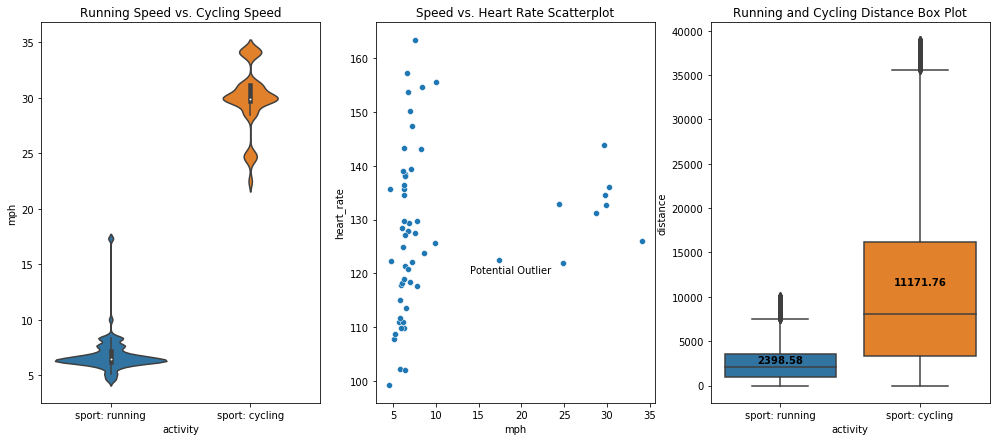

In [2]:
df = pd.read_csv('../assets/strava.csv')
df1 = pd.read_csv('../assets/activities.csv')

activitydf = (df.merge(df1, left_on='datafile', right_on='datafile')).reindex()


#todatetime
activitydf['timestamp'] = pd.to_datetime(activitydf['timestamp'])

avgdf = activitydf.groupby(['datafile']).mean()

plt.subplots(1, 3,figsize=(17,7))

ax = plt.subplot(1,3,1)
ax = sns.violinplot(x='activity', y='mph', data=activitydf) 
ax.set_title('Running Speed vs. Cycling Speed')

ax1 = plt.subplot(1,3,2)
ax1 = sns.scatterplot(data=avgdf, x="mph", y="heart_rate")
plt.annotate("Potential Outlier", (14, 120))
ax1.set_title('Speed vs. Heart Rate Scatterplot')

ax2 = plt.subplot(1,3,3)
ax2 = sns.boxplot(data=activitydf, x="activity", y="distance")
ax2.set_title('Running and Cycling Distance Box Plot')
means = activitydf.groupby(['activity'])['distance'].mean()
means = round(means,2)
means = means[::-1]
vertical_offset = activitydf['distance'].mean()*0.03 # offset from median for display
for xtick in ax2.get_xticks():
    ax2.text(xtick,means[xtick]+ vertical_offset,means[xtick], 
            horizontalalignment='center',color='Black',weight='semibold')




Some things to notice in the graphs above is that there is a drastic difference in the violin plot for running and cycling, as is expected. Professor brooks most likely jogged/ran at around 6-9 mph, and biking was around 29mph. There is an outlier where either Professor Brooks was sprinting at 17mph, or the tracker picked up a biking session as a run.

The scatter plot shows that going faster generally does not mean an increased heart rate. This is probably because it takes less work on a bike to go that fast. We see the outlier from the running data in the first plot, and the heart rate is not increased, which suggests that this should have been a biking activity.

The box plots shows the average distance traveled for each activity. It makes sense that with a bike, Professor Brooks can readily 


## Some Advanced Visual Analyses

Something cool about this data is that Professor Brooks tracked location; so with that we can map a variety of things. Let's begin by setting figuresize for our plots, setting the positions with correct units of degrees, and then splitting the data to get just cycling data.

We want to project this map data using the [Mercator Projection](https://wiki.openstreetmap.org/wiki/Mercator), which the function lat2y. 

Finally, we read in the map that we downloaded from openstreetmap.org that correlates to Professor Brooks location, and plot it. We then use the scatter function to plot the heart rate along the path of his biking trail for three different days.


Text(0.5, 0.98, 'Heart Rate Data of Sept 12, Sept 14, and Oct 03')

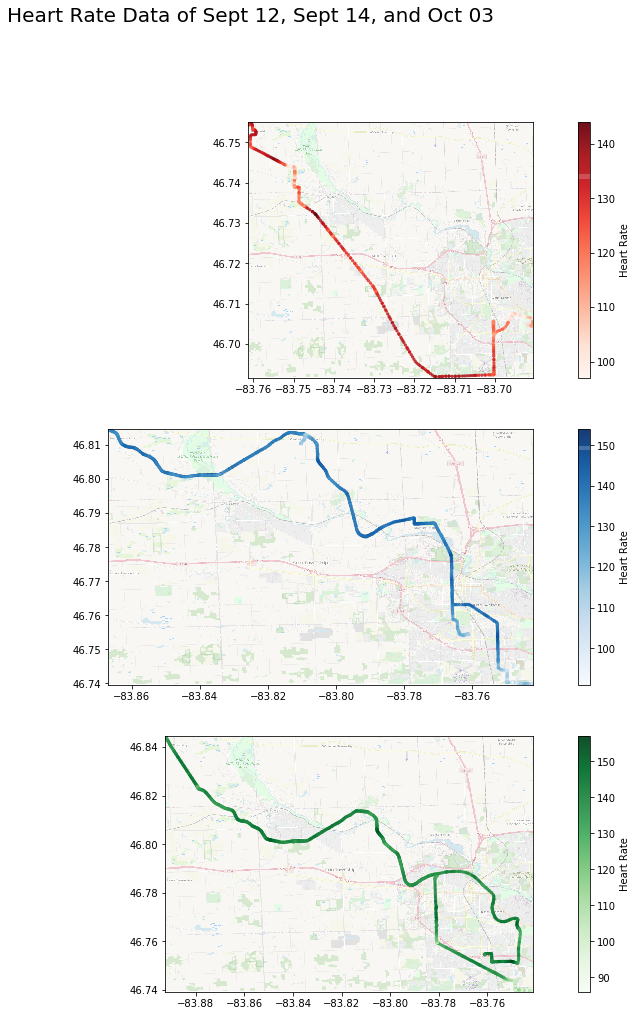

In [3]:
mpl.rcParams['figure.figsize'] = [16.0,16.0]

activitydf['position_lat_degrees'] = activitydf['position_lat'] * (180/2**31)
activitydf['position_long_degrees'] = activitydf['position_long'] * (180/2**31)
bikingdf = activitydf[activitydf["activity"] == 'sport: cycling' ]
bikingdf = bikingdf[bikingdf['position_lat_degrees'].notna()]
bikingdf = bikingdf[bikingdf['position_long_degrees'].notna()]

#print(bikingdf['timestamp'].head(100))

def lat2y(a):
    return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))

bikingdf['position_lat_mercant'] = bikingdf['position_lat_degrees'].apply(lat2y)
sept12 = bikingdf[(bikingdf['timestamp'] > '2019-09-12 00:00') & (bikingdf['timestamp'] < '2019-09-12 23:59')]
sept14 = bikingdf[(bikingdf['timestamp'] > '2019-09-14 00:00') & (bikingdf['timestamp'] < '2019-09-14 23:59')]
oct03 = bikingdf[(bikingdf['timestamp'] > '2019-10-03 00:00') & (bikingdf['timestamp'] < '2019-10-03 23:59')]


#print(bikingdf.timestamp.dt.date.value_counts())
#print(bikingdf['position_lat_degrees'].max())
#print(bikingdf['position_lat_degrees'].min())
#print(bikingdf['position_long_degrees'].max())
#print(bikingdf['position_long_degrees'].min())

fig = plt.figure()

image = plt.imread('../assets/map5.png')

ax = fig.add_subplot(311)
plt.imshow(image, alpha=0.5, extent=[sept12['position_long_degrees'].min(),sept12['position_long_degrees'].max(),sept12['position_lat_mercant'].min(),sept12['position_lat_mercant'].max()])
ax = plt.scatter(sept12['position_long_degrees'],sept12['position_lat_mercant'],s=5,c=sept12['heart_rate'],cmap='Reds',alpha=0.75)
plt.colorbar(ax).set_label("Heart Rate")

ax1 = fig.add_subplot(312)
plt.imshow(image, alpha=0.5, extent=[sept14['position_long_degrees'].min(),sept14['position_long_degrees'].max(),sept14['position_lat_mercant'].min(),sept14['position_lat_mercant'].max()])
ax1 = plt.scatter(sept14['position_long_degrees'],sept14['position_lat_mercant'],s=5,c=sept14['heart_rate'],cmap='Blues',alpha=0.75)
plt.colorbar(ax1).set_label("Heart Rate")

ax2 = fig.add_subplot(313)
plt.imshow(image, alpha=0.5, extent=[oct03['position_long_degrees'].min(),oct03['position_long_degrees'].max(),oct03['position_lat_mercant'].min(),oct03['position_lat_mercant'].max()])
ax2 = plt.scatter(oct03['position_long_degrees'],oct03['position_lat_mercant'],s=5,c=oct03['heart_rate'],cmap='Greens',alpha=0.75)
plt.colorbar(ax2).set_label("Heart Rate")

plt.suptitle('Heart Rate Data of Sept 12, Sept 14, and Oct 03',size=20)

Something to notice from these graphs is that near the middle of the paths, heart rates seem to increase. Suggesting that either Professor Brooks bikes harder, faster, or is doing something more strenuous (like climbing a hill). Also, Professor Brooks, generally takes a smiliar route north and back. Isn't that awesome!

## 3D Data

From the previous data we mentioned how there is a possiblity of heart rate being related to the fact that he is climbing some hills. So we can look at the altitude data that is stored by his trackers. 


Text(0.0, 1.0, 'Heart Rate Compared to Altitude')

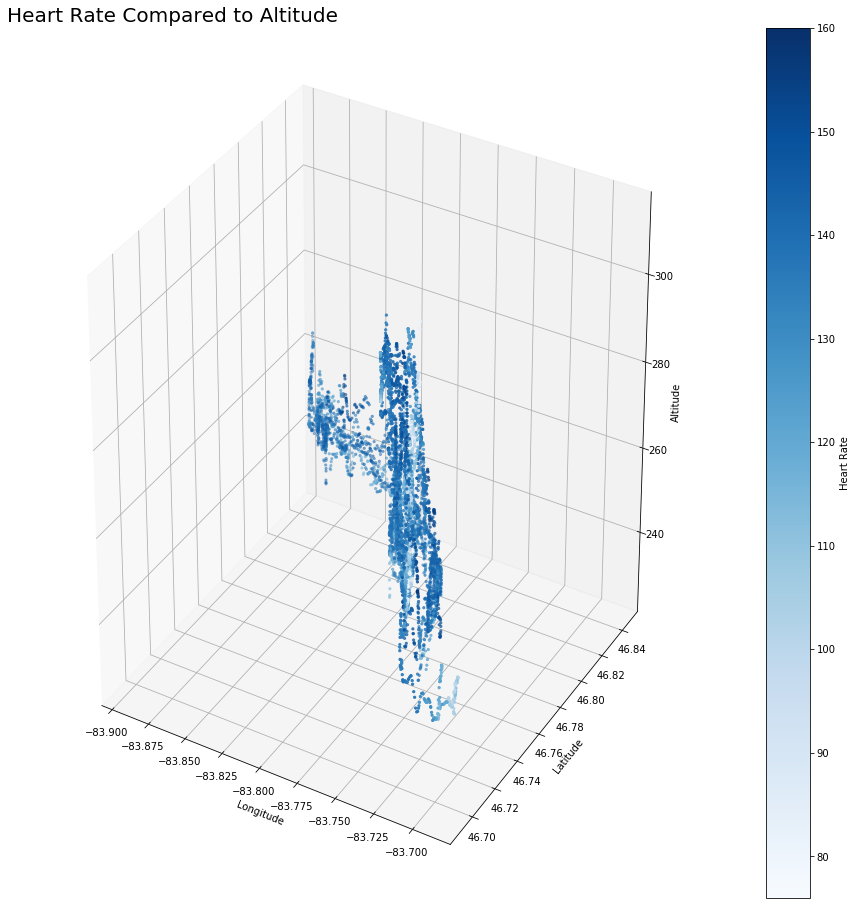

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax1=ax.scatter(bikingdf["position_long_degrees"],bikingdf["position_lat_mercant"],bikingdf["enhanced_altitude"],s=5, c=bikingdf["heart_rate"], cmap='Blues')
plt.colorbar(ax1).set_label("Heart Rate")

# Now let's setup some axes labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
ax.set_title('Heart Rate Compared to Altitude', size=20,loc='left')

The data supports the story of how during the beginning of the incline, the heart rate increases. This heart rate decreases as he goes down the hill as well, which makes sense since he's not pedaling as hard. In coclusion, Professor Brooks cycles often, and cycles hard (top speed of almost 35mph). He cycles through the hills of Ann Arbor which contribute to a better workout (per the increased Heart Rate), and he takes a similiar path to and from Ann Arbor.
